In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download('https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asp101
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
from torchvision.transforms import transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from PIL import Image
from sklearn.preprocessing import LabelEncoder

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
for dirpath,dirname,filename in os.walk('/content/plant-disease-recognition-dataset'):
  print(dirpath,len(dirname),len(filename))

/content/plant-disease-recognition-dataset 3 0
/content/plant-disease-recognition-dataset/Train 1 0
/content/plant-disease-recognition-dataset/Train/Train 3 0
/content/plant-disease-recognition-dataset/Train/Train/Rust 0 434
/content/plant-disease-recognition-dataset/Train/Train/Powdery 0 430
/content/plant-disease-recognition-dataset/Train/Train/Healthy 0 458
/content/plant-disease-recognition-dataset/Test 1 0
/content/plant-disease-recognition-dataset/Test/Test 3 0
/content/plant-disease-recognition-dataset/Test/Test/Rust 0 50
/content/plant-disease-recognition-dataset/Test/Test/Powdery 0 50
/content/plant-disease-recognition-dataset/Test/Test/Healthy 0 50
/content/plant-disease-recognition-dataset/Validation 1 0
/content/plant-disease-recognition-dataset/Validation/Validation 3 0
/content/plant-disease-recognition-dataset/Validation/Validation/Rust 0 20
/content/plant-disease-recognition-dataset/Validation/Validation/Powdery 0 20
/content/plant-disease-recognition-dataset/Validation

In [ ]:
train_dir = '/content/plant-disease-recognition-dataset/Train/Train'
test_dir = '/content/plant-disease-recognition-dataset/Test/Test'
val_dir = '/content/plant-disease-recognition-dataset/Validation/Validation'

In [ ]:
image_paths = []
labels = []

for i in os.listdir('/content/plant-disease-recognition-dataset'):
  for j in os.listdir(f'/content/plant-disease-recognition-dataset/{i}'):
    for label in os.listdir(f'/content/plant-disease-recognition-dataset/{i}/{j}'):
      for image in os.listdir(f'/content/plant-disease-recognition-dataset/{i}/{j}/{label}'):
        image_paths.append(f'/content/plant-disease-recognition-dataset/{i}/{j}/{label}/{image}')
        labels.append(label)

In [ ]:
df = pd.DataFrame({'image_paths':image_paths,'labels':labels})

In [ ]:
df.sample(10)

,image_paths,labels
999,/content/plant-disease-recognition-dataset/Tra...,Healthy
326,/content/plant-disease-recognition-dataset/Tra...,Rust
1160,/content/plant-disease-recognition-dataset/Tra...,Healthy
1467,/content/plant-disease-recognition-dataset/Tes...,Healthy
32,/content/plant-disease-recognition-dataset/Tra...,Rust
530,/content/plant-disease-recognition-dataset/Tra...,Powdery
1162,/content/plant-disease-recognition-dataset/Tra...,Healthy
1440,/content/plant-disease-recognition-dataset/Tes...,Healthy
1253,/content/plant-disease-recognition-dataset/Tra...,Healthy
977,/content/plant-disease-recognition-dataset/Tra...,Healthy


In [ ]:
le = LabelEncoder()
le.fit(df['labels'])
df['labels'] = le.transform(df['labels'])

In [ ]:
df.sample(10)

,image_paths,labels
667,/content/plant-disease-recognition-dataset/Tra...,1
1512,/content/plant-disease-recognition-dataset/Val...,0
709,/content/plant-disease-recognition-dataset/Tra...,1
574,/content/plant-disease-recognition-dataset/Tra...,1
1351,/content/plant-disease-recognition-dataset/Tes...,2
648,/content/plant-disease-recognition-dataset/Tra...,1
157,/content/plant-disease-recognition-dataset/Tra...,2
488,/content/plant-disease-recognition-dataset/Tra...,1
1331,/content/plant-disease-recognition-dataset/Tes...,2
550,/content/plant-disease-recognition-dataset/Tra...,1


In [ ]:
le.inverse_transform([0,1,2])

array(['Healthy', 'Powdery', 'Rust'], dtype=object)

(np.float64(-0.5), np.float64(3999.5), np.float64(2999.5), np.float64(-0.5))

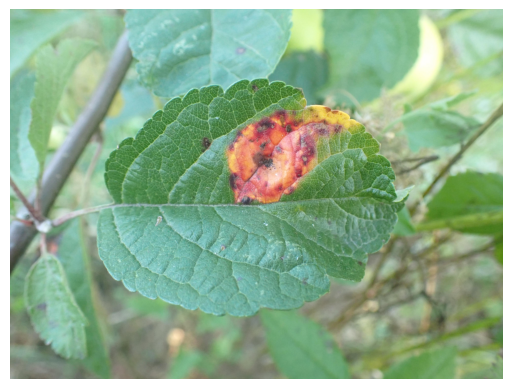

In [ ]:
img = Image.open(df['image_paths'][23])
plt.imshow(img)
plt.axis(False)

In [ ]:
transform = transforms.Compose(
    [
        transforms.Resize((128,128)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(degrees=30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor()
    ]
)

In [ ]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=transform,
    target_transform=None
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=transform,
    target_transform=None
)
val_data = datasets.ImageFolder(
    root=val_dir,
    transform=transform,
    target_transform=None
)

In [ ]:
img, label = train_data[0]

In [ ]:
img, label

(tensor([[[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          ...,
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627]],
 
         [[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          ...,
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627]],
 
         [[0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ..., 0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0627,  ...,

In [ ]:
img.shape

torch.Size([3, 128, 128])

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

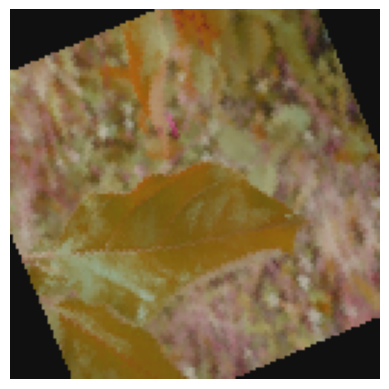

In [ ]:
plt.imshow(img.permute(1,2,0))
plt.axis(False)

In [ ]:
BATCH_SIZE=24

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

val_dataloader = DataLoader(
    dataset=val_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
img ,label = next(iter(train_dataloader))

In [ ]:
print(img.shape) ## batch (list of 24 images)
print(img[0].shape) ## single image from batch
print(label.shape)
print(label[0].shape)

torch.Size([24, 3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([24])
torch.Size([])


In [ ]:
class ModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()

    self.conv_layer_1 = nn.Conv2d(
        in_channels=input_shape,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
    )

    self.conv_layer_2 = nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
    )

    # self.conv_layer_3 = nn.Conv2d(
    #     in_channels=hidden_units,
    #     out_channels=hidden_units,
    #     kernel_size=3,
    #     stride=1,
    #     padding=1
    # )

    self.pooling = nn.MaxPool2d(
        kernel_size=2,
        stride=2
    )

    self.relu = nn.ReLU()

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Dropout(p=0.5),
        nn.Linear(
            in_features=hidden_units*32*32,
            out_features=output_shape,
        )
    )

  def forward(self,x):
    # print(x.shape)
    x = self.conv_layer_1(x)
    # print(x.shape)
    x = self.relu(x)
    # print(x.shape)
    x = self.pooling(x)
    # print(x.shape)
    x = self.conv_layer_2(x)
    # print(x.shape)
    x = self.relu(x)
    # print(x.shape)
    x = self.pooling(x)
    # print(x.shape)
    # x = self.conv_layer_3(x)
    # print(x.shape)
    # x = self.relu(x)
    # print(x.shape)
    # x = self.pooling(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [ ]:
model_0 = ModelV0(input_shape=3,
                  hidden_units=32,
                  output_shape=3).to(device)

In [ ]:
model_0

ModelV0(
  (conv_layer_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_layer_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=32768, out_features=3, bias=True)
  )
)

In [ ]:
model_0(img.to(device))

tensor([[ 0.0776, -0.0064,  0.0072],
        [-0.0036, -0.0844, -0.0301],
        [ 0.0004, -0.0487,  0.0273],
        [-0.0888, -0.0359,  0.0131],
        [-0.0537,  0.0113, -0.0282],
        [ 0.0411, -0.0119,  0.1058],
        [ 0.0114, -0.0408, -0.0179],
        [ 0.0552,  0.0197,  0.0278],
        [ 0.0371, -0.0339, -0.0117],
        [ 0.0185, -0.0353,  0.0557],
        [ 0.0373, -0.0538,  0.1273],
        [ 0.0269,  0.0338,  0.0051],
        [-0.0021,  0.0137,  0.0200],
        [-0.0017, -0.0363, -0.0203],
        [ 0.0567, -0.0751,  0.0322],
        [ 0.0251, -0.0320,  0.1159],
        [-0.0447,  0.0447,  0.0239],
        [ 0.0054,  0.0030, -0.0104],
        [-0.0281, -0.1013, -0.0007],
        [-0.0355,  0.0382,  0.1315],
        [ 0.0031, -0.0409,  0.0172],
        [ 0.0461,  0.0391,  0.1078],
        [ 0.0379,  0.0045,  0.0191],
        [ 0.0576, -0.0348,  0.0652]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001)

In [ ]:
def train_step(model:nn.Module,
               loss_fn:nn.Module,
               optimizer:torch.optim.Optimizer,
               dataset:torch.utils.data.dataloader):

  model.to(device)
  model.train()
  train_loss,train_acc = 0,0
  for batch,(X,y) in enumerate(dataset):
    X = X.to(device)
    y = y.to(device)

    y_logist = model(X)
    y_pred_prob = torch.softmax(y_logist,dim=1)
    y_pred_labels = torch.argmax(y_pred_prob,dim=1)
    loss = loss_fn(y_logist,y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_acc += (((y_pred_labels==y).sum().item())/len(y_logist))

  train_acc /= len(dataset)
  train_loss /= len(dataset)

  return train_loss,train_acc


In [ ]:
def test_step(model:torch.nn.Module,
              dataset:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):

  model.to(device)
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for (X,y) in dataset:
      X = X.to(device)
      y = y.to(device)
      y_logist = model(X)
      y_pred_prob = torch.softmax(y_logist,dim=1)
      y_pred_labels = torch.argmax(y_pred_prob,dim=1)
      loss = loss_fn(y_logist,y)
      test_loss += loss.item()
      test_acc += (((y_pred_labels==y).sum().item()) / len(y_logist))

    test_loss /= len(dataset)
    test_acc /= len(dataset)

  return test_loss, test_acc
  # print(f'test loss {test_loss} | test_accuracy {test_acc}')


In [ ]:
def train(model:torch.nn.Module,
          train_dataset:torch.utils.data.DataLoader,
          test_dataset:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int):

  results = {
      'train_loss':[],
      'train_acc':[],
      'test_loss':[],
      'test_acc':[]
  }

  for epoch in range(epochs):

    train_loss,train_acc = train_step(model=model,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      dataset=train_dataset,
                                      )
    test_loss,test_acc = test_step(model=model,
                                   dataset=test_dataset,
                                   loss_fn=loss_fn,
                                   )
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

    print(f'epoch {epoch+1} | train_loss {train_loss} | train_acc {train_acc} | test_loss {test_loss} | test_acc {test_acc}')

  return results

In [ ]:
results = train(model=model_0,
      train_dataset=train_dataloader,
      test_dataset=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=10)

epoch 1 | train_loss 1.095249789101737 | train_acc 0.34598214285714285 | test_loss 1.103162748473031 | test_acc 0.2976190476190476
epoch 2 | train_loss 1.090772147689547 | train_acc 0.4032738095238096 | test_loss 1.0944289309637887 | test_acc 0.42857142857142855
epoch 3 | train_loss 1.0831691175699234 | train_acc 0.4181547619047619 | test_loss 1.093687287398747 | test_acc 0.3154761904761904
epoch 4 | train_loss 1.0778407071317946 | train_acc 0.4494047619047619 | test_loss 1.0778927632740565 | test_acc 0.5178571428571428
epoch 5 | train_loss 1.0689206144639425 | train_acc 0.47842261904761907 | test_loss 1.0851233516420637 | test_acc 0.42857142857142855
epoch 6 | train_loss 1.0582948752811976 | train_acc 0.49702380952380976 | test_loss 1.0600976603371757 | test_acc 0.511904761904762
epoch 7 | train_loss 1.0474547296762466 | train_acc 0.4918154761904762 | test_loss 1.0663327489580428 | test_acc 0.4523809523809524
epoch 8 | train_loss 1.0326494500041008 | train_acc 0.5252976190476191 | tes

TypeError: 'str' object is not callable

In [ ]:
## transfer learning

In [ ]:
import torchvision.models as models

In [ ]:
model_1 = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 184MB/s]


In [ ]:
model_1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model_1.fc = nn.Linear(
    in_features=model_1.fc.in_features,
    out_features=3
)

In [ ]:
for param in model_1.parameters():
    param.requires_grad = False

for param in model_1.fc.parameters():
    param.requires_grad = True

In [ ]:
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_transform = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor()
    ]
)

test_transform = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor()
    ]
)

In [ ]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform,
    target_transform=None
)
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=test_transform,
    target_transform=None
)
val_data = datasets.ImageFolder(
    root=val_dir,
    transform=test_transform,
    target_transform=None
)

In [ ]:
img, label = train_data[0]

In [ ]:
img.shape

torch.Size([3, 224, 224])

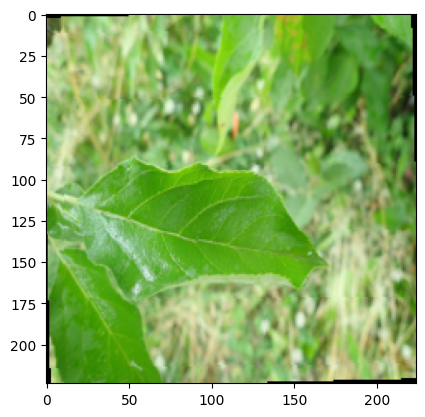

In [ ]:
plt.imshow(img.permute(1,2,0))

In [ ]:
BATCH_SIZE=24

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

val_dataloader = DataLoader(
    dataset=val_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
img ,label = next(iter(train_dataloader))

In [ ]:
print(img.shape) ## batch (list of 24 images)
print(img[0].shape) ## single image from batch
print(label.shape)
print(label[0].shape)

torch.Size([24, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([24])
torch.Size([])


In [ ]:
results = train(model=model_1,
          train_dataset=train_dataloader,
          test_dataset=test_dataloader,
          optimizer=optimizer,
          loss_fn=loss_fn,
          epochs=10)

epoch 1 | train_loss 0.17547008681244083 | train_acc 0.9553571428571427 | test_loss 0.20378873177937099 | test_acc 0.9642857142857143
epoch 2 | train_loss 0.16125431769926632 | train_acc 0.9471726190476193 | test_loss 0.19822796141462667 | test_acc 0.9642857142857143
epoch 3 | train_loss 0.15376547457916395 | train_acc 0.9501488095238095 | test_loss 0.2100389123495136 | test_acc 0.9642857142857143
epoch 4 | train_loss 0.1564643007170941 | train_acc 0.9605654761904765 | test_loss 0.22248826694807836 | test_acc 0.9285714285714286
epoch 5 | train_loss 0.15139199640335782 | train_acc 0.9456845238095238 | test_loss 0.20832789077290467 | test_acc 0.9642857142857143
epoch 6 | train_loss 0.1618107434229127 | train_acc 0.9583333333333337 | test_loss 0.19361355608063086 | test_acc 0.9642857142857143
epoch 7 | train_loss 0.14798291958868504 | train_acc 0.9598214285714286 | test_loss 0.18825202328818186 | test_acc 0.9583333333333333
epoch 8 | train_loss 0.14046311897358724 | train_acc 0.9635416666

In [ ]:
results

{'train_loss': [0.17547008681244083,
  0.16125431769926632,
  0.15376547457916395,
  0.1564643007170941,
  0.15139199640335782,
  0.1618107434229127,
  0.14798291958868504,
  0.14046311897358724,
  0.13108290299507125,
  0.15241221651168807],
 'train_acc': [0.9553571428571427,
  0.9471726190476193,
  0.9501488095238095,
  0.9605654761904765,
  0.9456845238095238,
  0.9583333333333337,
  0.9598214285714286,
  0.9635416666666669,
  0.9680059523809527,
  0.9575892857142859],
 'test_loss': [0.20378873177937099,
  0.19822796141462667,
  0.2100389123495136,
  0.22248826694807836,
  0.20832789077290467,
  0.19361355608063086,
  0.18825202328818186,
  0.1989661111895527,
  0.1966623826218503,
  0.1856057963200978],
 'test_acc': [0.9642857142857143,
  0.9642857142857143,
  0.9642857142857143,
  0.9285714285714286,
  0.9642857142857143,
  0.9642857142857143,
  0.9583333333333333,
  0.9642857142857143,
  0.9583333333333333,
  0.9583333333333333]}

In [ ]:
def plot_loss_curves(results:dict[str,list[float]]):
  loss = results['train_loss']
  test_loss = results['test_loss']

  acc = results['train_acc']
  test_acc = results['test_acc']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs,acc,label='train_acc')
  plt.plot(epochs,test_acc,label='test_acc')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,test_loss,label='test_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

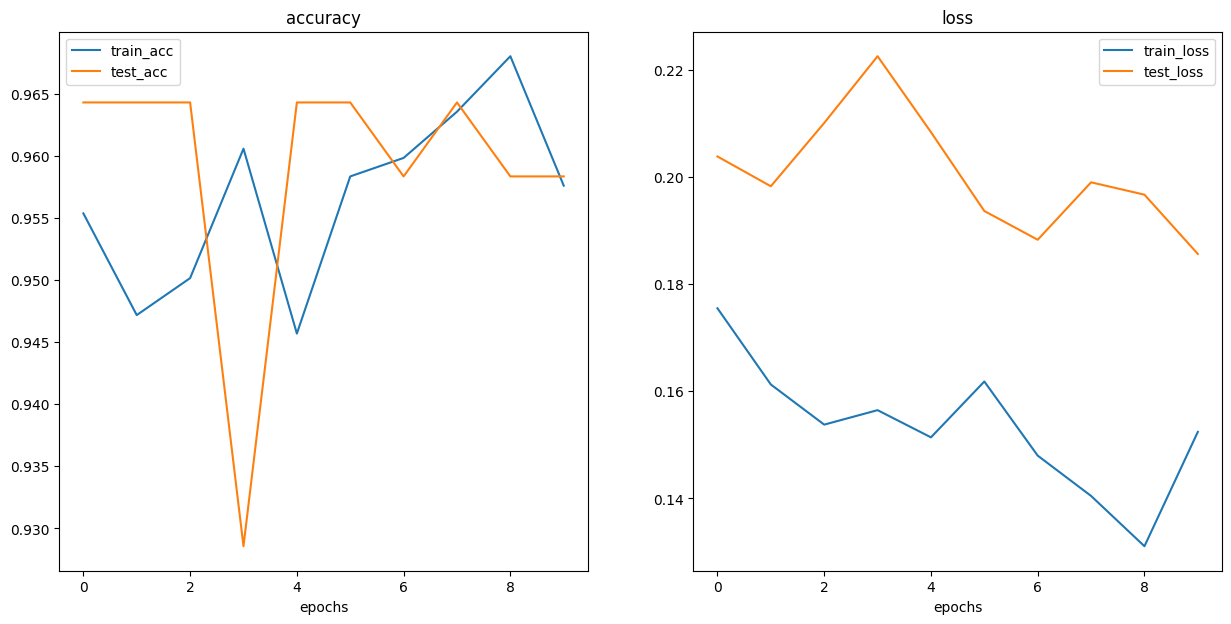

In [ ]:
plot_loss_curves(results)

In [ ]:
img,label = next(iter(val_dataloader))

(<matplotlib.image.AxesImage at 0x7ad9e43ded90>, tensor(0))

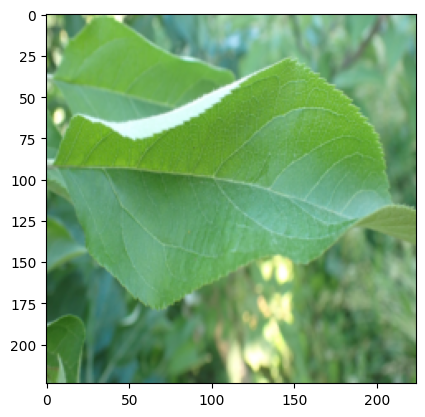

In [ ]:
plt.imshow(img[2].permute(1,2,0)), label[2]

In [ ]:
def predict(img:torch.tensor):
  model_1.eval()
  with torch.inference_mode():
    model_1.to(device)
    img = img.unsqueeze(dim=0)
    img = img.to(device)
    pred = model_1(img)
    pred_prob = torch.softmax(pred,dim=1)
    pred_label = torch.argmax(pred_prob,dim=1)
    return pred_label

In [ ]:
predict(img[2])

tensor([0], device='cuda:0')